#Data Discovery

In [2]:
# Import libraries
import pandas as pd
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score, recall_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import LeaveOneOut

In [3]:
# Load the Pima Indians dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
feature_names = names[:8]
data = pd.read_csv(url, names=names)

In [4]:
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data[:5]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
def show_num_inst(data):
  # Compter le nombre d'instances pour chaque classe
  class_counts = data['class'].value_counts()

  # Définir les étiquettes et les valeurs pour le graph
  labels = class_counts.index
  values = class_counts.values

  # Configurer et afficher le graph
  plt.bar(labels, values)
  plt.xlabel('Class')
  plt.ylabel('Count')
  plt.title('Number of Instances per Class')
  plt.show()

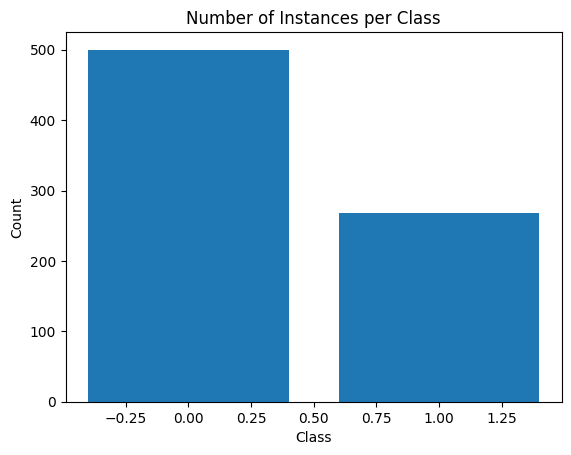

In [7]:
show_num_inst(data)

In [8]:
#Splitting the data into dependent and independent variables
X = data.drop("class", axis=1)
Y =  data["class"]

In [10]:
def plot_input(X,Y,title=""):
  # Convert the data from numpy array to a pandas dataframe
  df_ros = pd.DataFrame({'Age': X["age"], 'Blood_Pression': X["pres"], 'target': Y})
  # Plot the chart
  plt.figure(figsize=(12, 8))
  sns.scatterplot(x = 'Age', y = 'Blood_Pression', hue = 'target', data = df_ros)
  plt.title(title)

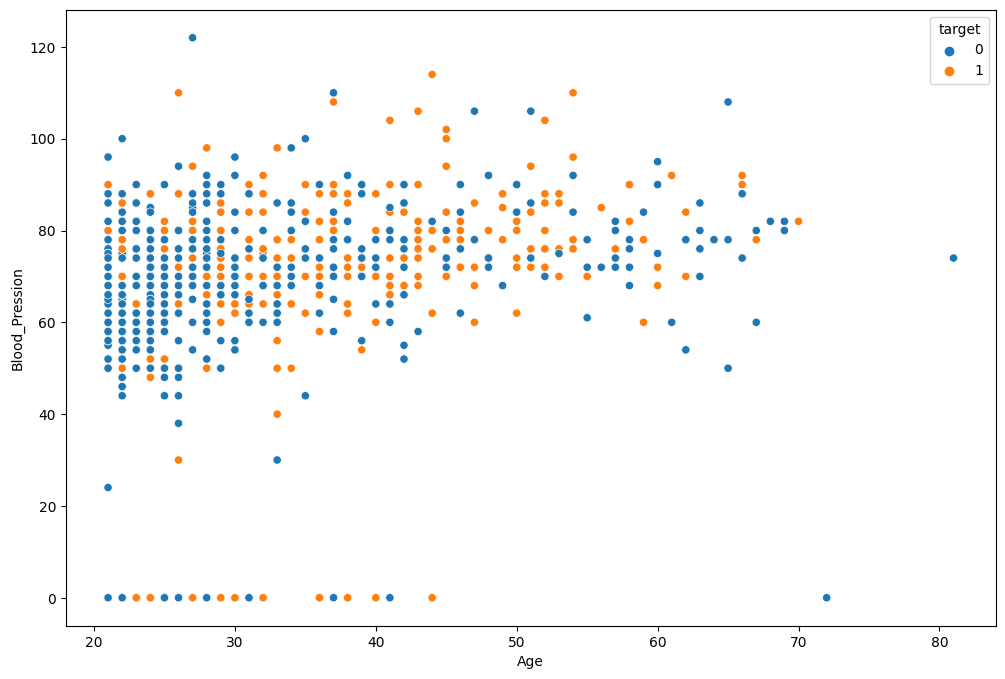

In [11]:
plot_input(X,Y)

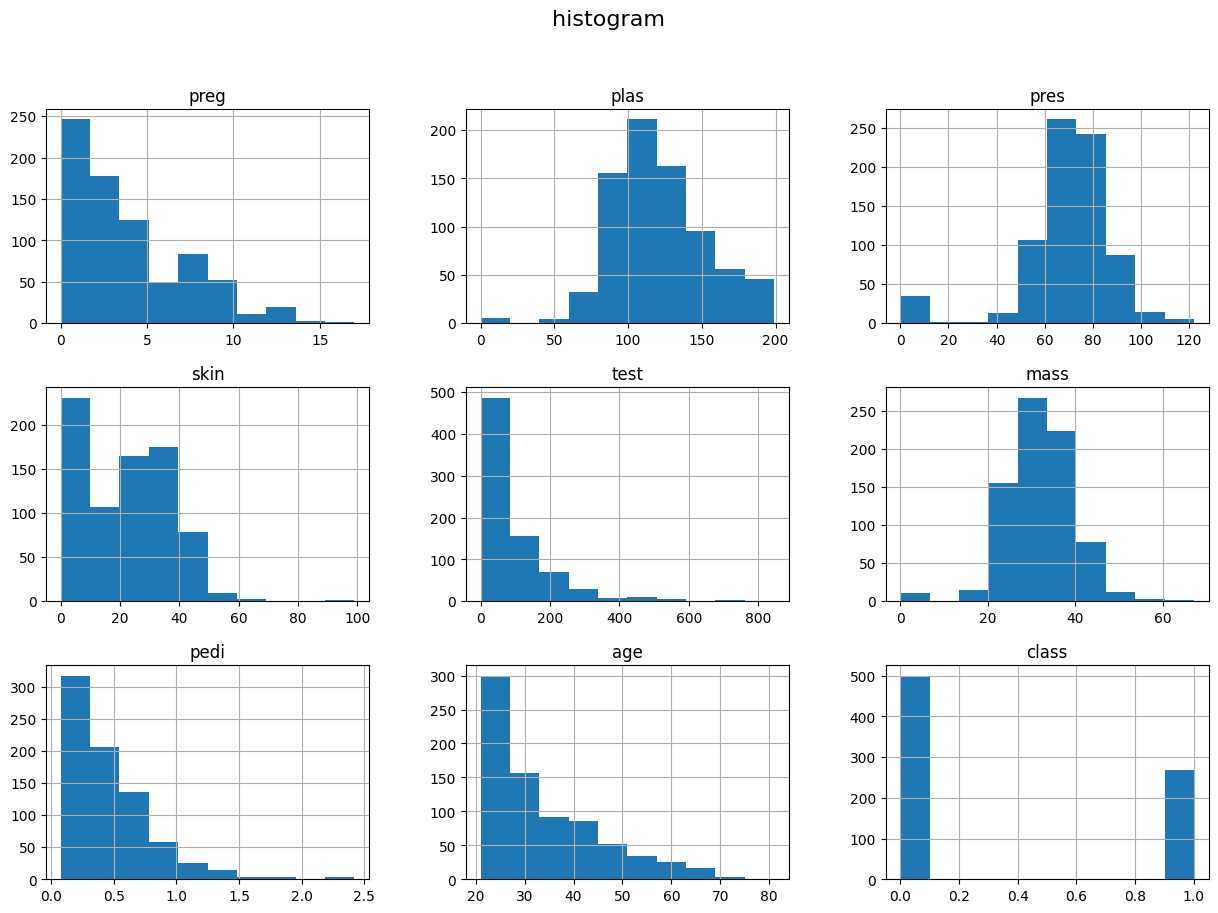

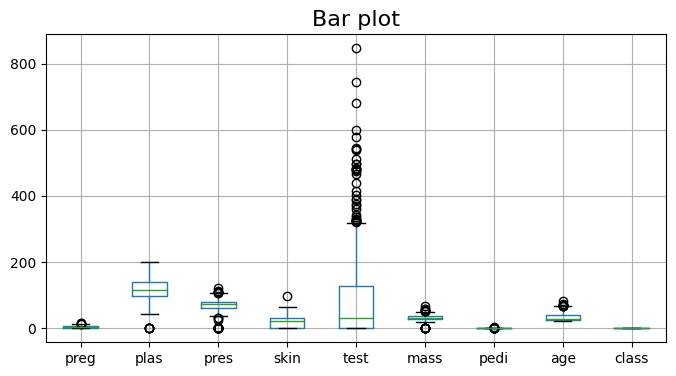

In [13]:
#histogramms
data.hist(figsize=(15,10))
plt.suptitle("histogram", fontsize=16)
plt.show()
#boxplot
data.boxplot(figsize=(8,4))
plt.title("Bar plot", fontsize=16)
plt.show()

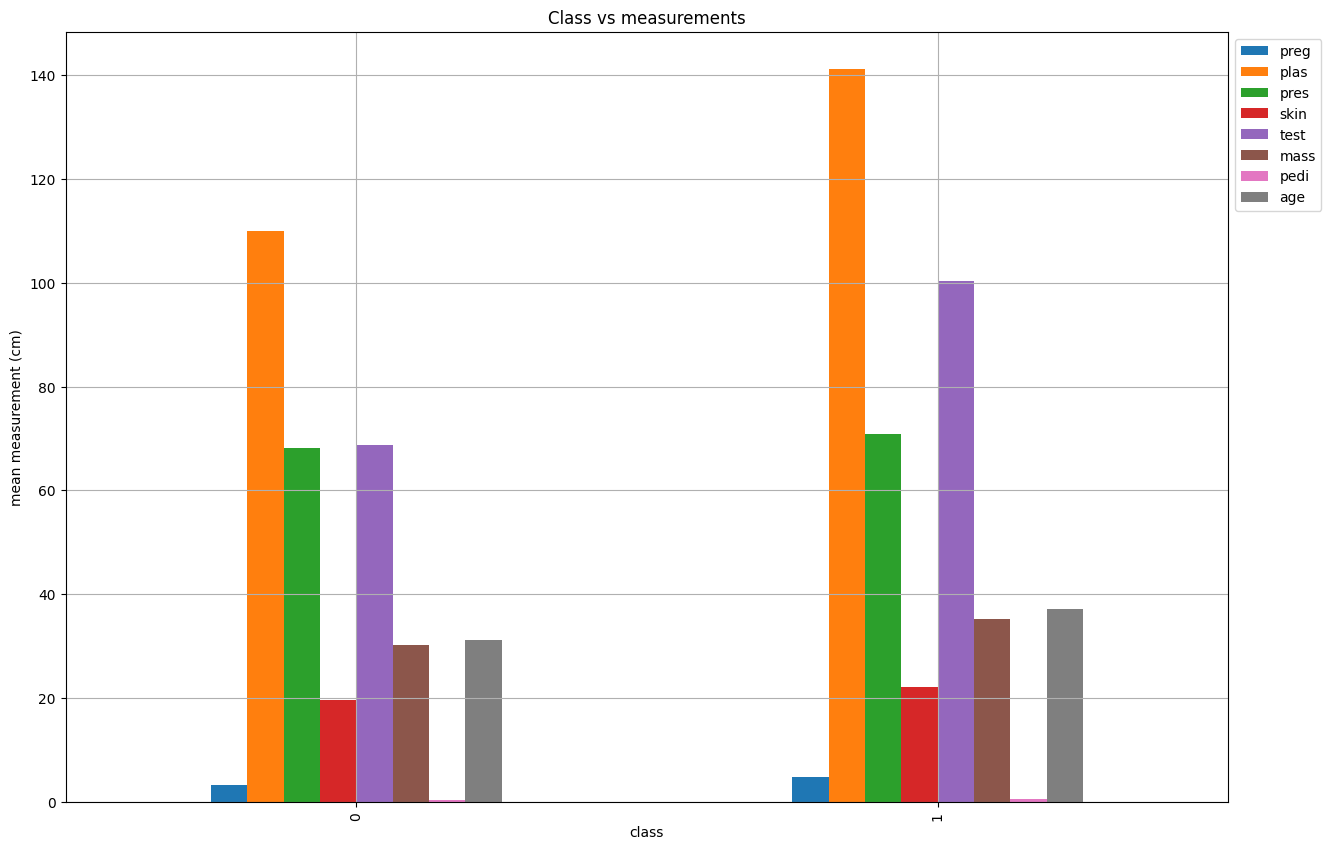

In [14]:
data.groupby(by = "class").mean()
data.groupby(by="class").mean().plot(kind="bar", figsize=(15,10))
plt.title('Class vs measurements')
plt.ylabel('mean measurement (cm)')
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
#check transformations
print(X[0:5,:])

#Save new dataset
df = pd.DataFrame(X, columns = feature_names)
X = pd.DataFrame(X,  columns = feature_names)
df["class"]=Y

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


# Equilibrage de la dataset






In [17]:
from imblearn.under_sampling import RandomUnderSampler
y = df["class"]
rus = RandomUnderSampler()
X1, y1 = rus.fit_resample(X, Y)

In [18]:
data1 = pd.DataFrame(X1)
data1["class"] = y1

In [19]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler()
X2, y2 = rus.fit_resample(X, Y)
data2 = pd.DataFrame(X2)
data2["class"] = y2

In [20]:
from  imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=3)
X3, y3 = oversample.fit_resample(X, Y)
data3 = pd.DataFrame(X3)
data3["class"] = y3

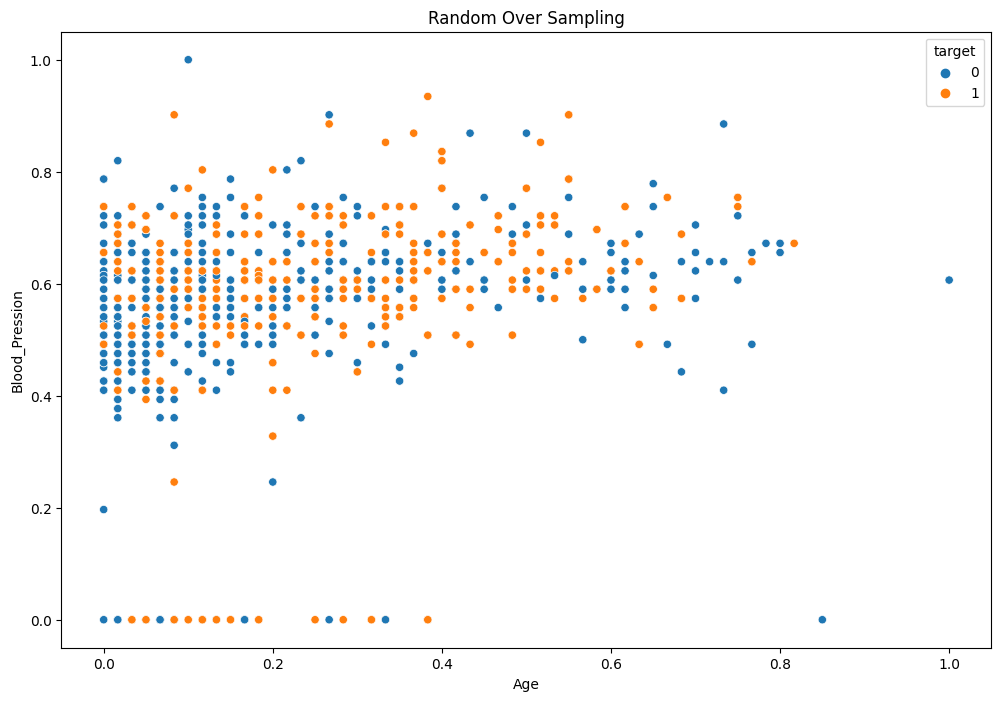

In [22]:
plot_input(X2,y2,'Random Over Sampling')

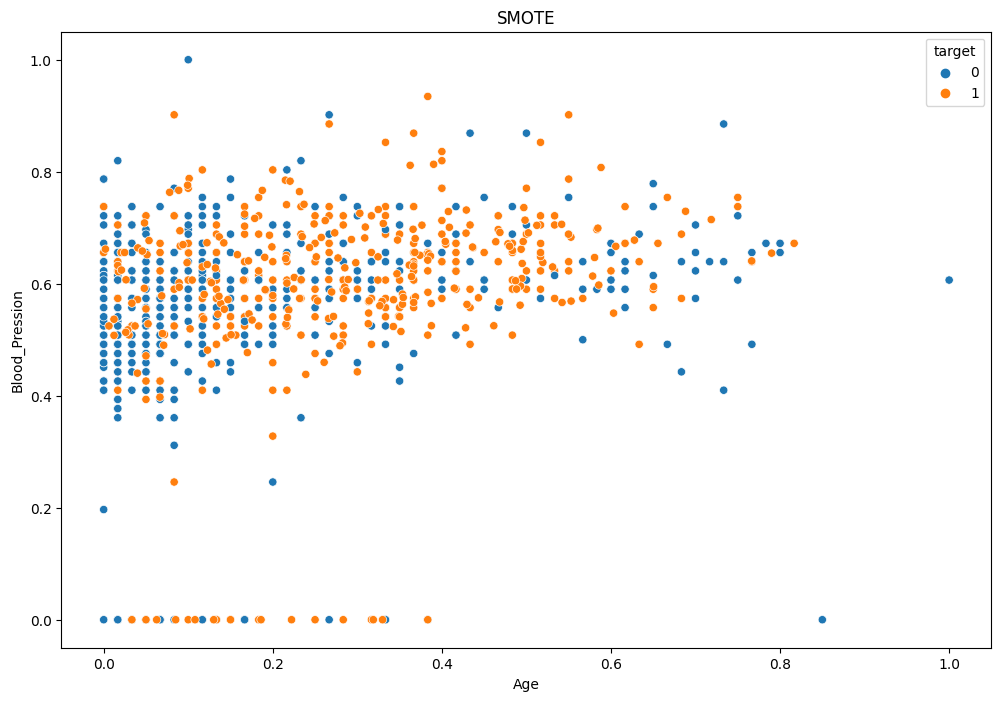

In [23]:
plot_input(X3,y3,'SMOTE')

#Feature Extraction



In [24]:
MI_score = mutual_info_classif(X, Y, random_state=0)
for feature in zip(feature_names, MI_score):
 print(feature)

('preg', 0.03306410669360904)
('plas', 0.12680533326286691)
('pres', 0.003267377404380545)
('skin', 0.0)
('test', 0.035542145915941736)
('mass', 0.07181993910372886)
('pedi', 0.010655570721384011)
('age', 0.04683313756038543)


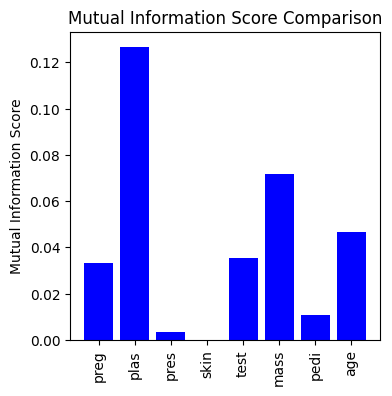

In [25]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

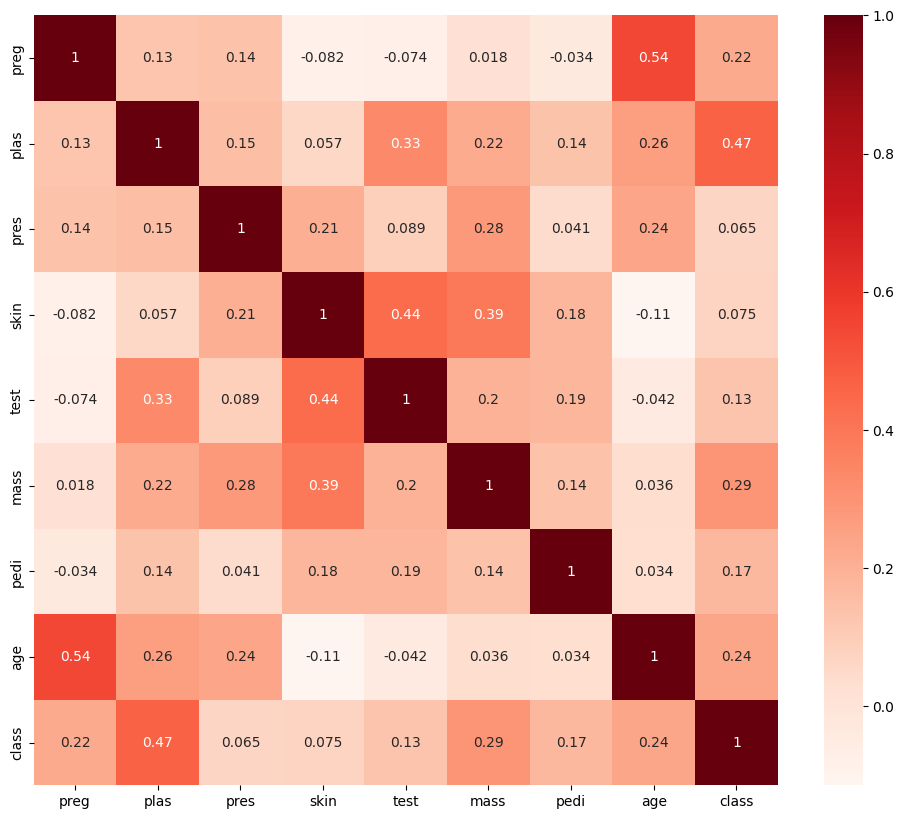

In [26]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [27]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

plas     0.466581
mass     0.292695
class    1.000000
Name: class, dtype: float64

In [28]:
print(df[["plas","mass"]].corr())

          plas      mass
plas  1.000000  0.221071
mass  0.221071  1.000000


In [29]:
# Use SelectKBest to select the best features based on univariate test results
selector = SelectKBest(k=2)
X_new = selector.fit_transform(X, Y)
print(X_new.shape)
print(selector.scores_)
print(selector.feature_names_in_)

(768, 2)
[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]
['preg' 'plas' 'pres' 'skin' 'test' 'mass' 'pedi' 'age']


In [31]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [41]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier()

# Initialize the Sequential Feature Selector
sfs = SFS(clf,
           k_features=4,
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=5)

# Fit the SFS to the data
sfs = sfs.fit(X, Y)

# Get the selected features
selected_features = list(sfs.k_feature_idx_)
print("Selected features:", selected_features)
print(sfs.subsets_)

Selected features: [1, 5, 6, 7]
{1: {'feature_idx': (1,), 'cv_scores': array([0.708, 0.708, 0.708, 0.739, 0.758]), 'avg_score': 0.7240217299040828, 'feature_names': ('plas',)}, 2: {'feature_idx': (1, 5), 'cv_scores': array([0.74 , 0.714, 0.734, 0.758, 0.699]), 'avg_score': 0.7291656056361939, 'feature_names': ('plas', 'mass')}, 3: {'feature_idx': (1, 5, 7), 'cv_scores': array([0.734, 0.682, 0.76 , 0.824, 0.725]), 'avg_score': 0.7448688566335624, 'feature_names': ('plas', 'mass', 'age')}, 4: {'feature_idx': (1, 5, 6, 7), 'cv_scores': array([0.753, 0.734, 0.753, 0.81 , 0.725]), 'avg_score': 0.7552414905356082, 'feature_names': ('plas', 'mass', 'pedi', 'age')}}


In [43]:
knn = KNeighborsClassifier()
efs = EFS(estimator=knn, # The Ml model
 min_features=1,
 max_features=8,
 scoring='accuracy', # The metric to use to evaluate the classifier is accuracy
 cv=5)
efs = efs.fit(X, Y)
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score
print('Best subset (corresponding names):', efs.best_feature_names_)
# best_feature_names_ shows the feature names that yield the best score

Features: 255/255

Best accuracy score: 0.76
Best subset (corresponding names): ('plas', 'pres', 'test', 'mass', 'pedi', 'age')


In [44]:
# Transform the dataset
X_new = efs.transform(X)
# Print the results
print('Number of features before transformation: {}'.format(X.shape[1]))
print('Number of features after transformation: {}'.format(X_new.shape[1]))


Number of features before transformation: 8
Number of features after transformation: 6


In [45]:
# Show the performance of each subset of features
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(4,)","[0.6883116883116883, 0.564935064935065, 0.5389...",0.562363,"(test,)",0.085805,0.066759,0.03338
2,"(2,)","[0.6168831168831169, 0.5714285714285714, 0.545...",0.565054,"(pres,)",0.036573,0.028455,0.014227
3,"(3,)","[0.512987012987013, 0.551948051948052, 0.61038...",0.584738,"(skin,)",0.057522,0.044754,0.022377
24,"(2, 6)","[0.5844155844155844, 0.6168831168831169, 0.538...",0.592496,"(pres, pedi)",0.038177,0.029703,0.014851
6,"(6,)","[0.5584415584415584, 0.6298701298701299, 0.545...",0.595119,"(pedi,)",0.052951,0.041198,0.020599
...,...,...,...,...,...,...,...
247,"(0, 1, 2, 3, 4, 5, 7)","[0.7727272727272727, 0.7272727272727273, 0.740...",0.753934,"(preg, plas, pres, skin, test, mass, age)",0.03881,0.030195,0.015098
179,"(0, 1, 4, 5, 7)","[0.7792207792207793, 0.7012987012987013, 0.727...",0.753977,"(preg, plas, test, mass, age)",0.049181,0.038265,0.019132
225,"(0, 1, 2, 4, 5, 7)","[0.7922077922077922, 0.7077922077922078, 0.727...",0.755258,"(preg, plas, pres, test, mass, age)",0.045221,0.035183,0.017592
204,"(1, 2, 4, 5, 7)","[0.7597402597402597, 0.6493506493506493, 0.766...",0.756634,"(plas, pres, test, mass, age)",0.07309,0.056867,0.028433


#Classification

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##KNN

In [48]:
clf =  KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.6948051948051948


In [50]:
#2 fold
model= KNeighborsClassifier(n_neighbors=3)
y_test_model = model.fit(X_train,y_train).predict(X_test)
y_train_model=model.fit(X_test,y_test).predict(X_train)
accuracy_score(y_train,y_train_model), accuracy_score(y_test, y_test_model)

(0.7035830618892508, 0.6948051948051948)

In [51]:
cross_val_score(clf, X, Y, cv=5)

array([0.753, 0.701, 0.714, 0.784, 0.719])

In [52]:
#lOOCV
scores = cross_val_score(model, X, Y, cv =LeaveOneOut() )
scores.mean()
print(scores)
print(scores.mean())

[1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.

In [53]:
# Define the different feature selection filters
filters = [
    ("f_classif", f_classif),
    ("mutual_info_classif", mutual_info_classif),
    ("chi2", chi2)
]

# Evaluate the performance of each feature selection filter
for name, filter_func in filters:
    print("Evaluating filter:", name)
    k_best = SelectKBest(filter_func, k=4)
    X_train_fs = k_best.fit_transform(X_train, y_train)
    X_test_fs = k_best.transform(X_test)

    # Train a Random Forest classifier
    model = KNeighborsClassifier()
    model.fit(X_train_fs, y_train)

    # Predict the target variables of test set
    y_pred = model.predict(X_test_fs)

    # Evaluate accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("---" * 20)

Evaluating filter: f_classif
Accuracy: 75.97%
------------------------------------------------------------
Evaluating filter: mutual_info_classif
Accuracy: 73.38%
------------------------------------------------------------
Evaluating filter: chi2
Accuracy: 75.32%
------------------------------------------------------------


In [54]:
model2 = KNeighborsClassifier()
y_pred=model2.fit(X_train,y_train).predict(X_test)
y_test_model=model2.predict(X_test)
cm1= confusion_matrix(y_test, y_test_model)
print("Confusion Matrix: \n", cm1)
print(accuracy_score(y_test, y_test_model))
print(precision_score(y_test, y_test_model, average='weighted'))
print(recall_score(y_test, y_test_model, average='macro'))
print("Accuracy:", accuracy_score(y_test, y_test_model))
print("Confusion matrix:", confusion_matrix(y_test, y_test_model))
print("Classification report :", classification_report(y_test, y_test_model))


Confusion Matrix: 
 [[78 21]
 [27 28]]
0.6883116883116883
0.6816326530612246
0.6484848484848484
Accuracy: 0.6883116883116883
Confusion matrix: [[78 21]
 [27 28]]
Classification report :               precision    recall  f1-score   support

           0       0.74      0.79      0.76        99
           1       0.57      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.68       154



In [55]:
#Grid search
Knn2 = KNeighborsClassifier()
grid_param={'n_neighbors': range(1,31),
 'weights' : ['uniform', 'distance'],
 'metric' : ['euclidean', 'manhattan', 'minkowski']}
grid = GridSearchCV(Knn2, grid_param, cv = 10, scoring = 'accuracy')
grid.fit(X,Y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7681989063568011
{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsClassifier(metric='euclidean', n_neighbors=15, weights='distance')


## Decision Tree

In [57]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
acc2 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc2)

Accuracy: 0.7532467532467533


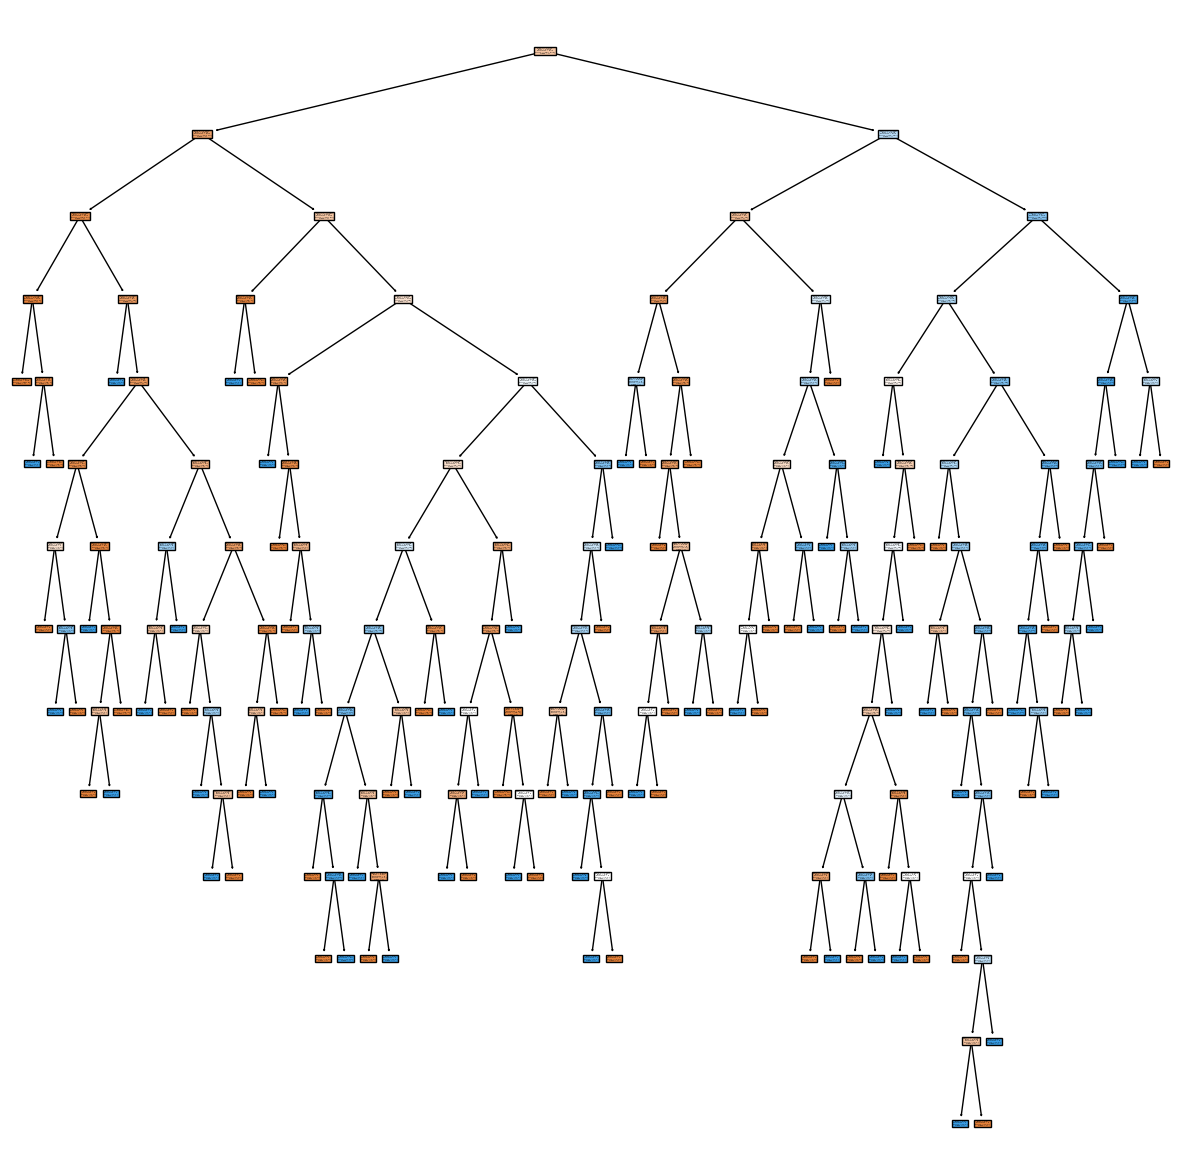

In [58]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf,
 feature_names=feature_names,
 class_names=["0","1"],
 filled=True)

In [86]:
#Grid search
DT = tree.DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid1 = GridSearchCV(DT, params, cv = 10, scoring = 'accuracy')
grid1.fit(X,y)
print(grid1.best_score_)
print(grid1.best_params_)
print(grid1.best_estimator_)


0.7422077922077922
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=2)


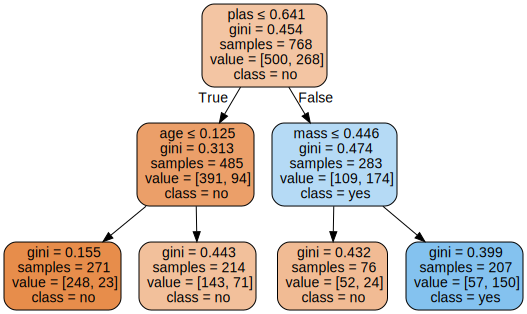

In [87]:
dot_data = tree.export_graphviz(grid1.best_estimator_, out_file=None,
feature_names=feature_names, class_names=['no','yes'],
 filled=True, rounded=True,
 special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [61]:
# Use a pruning algorithm to prune the decision tree
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate the pruned decision tree using the testing data
acc_scores = []
for clf in clfs:
    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    acc_scores.append(acc_score)

# Find the best pruning parameter based on accuracy score
best_clf = clfs[acc_scores.index(max(acc_scores))]

# Evaluate the best pruned decision tree using the testing data
y_pred = best_clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy score: {:.2f}".format(acc_score))
print("ccp_alpha: {:.3f}".format(ccp_alphas[acc_scores.index(max(acc_scores))]))

Accuracy score: 0.80
ccp_alpha: 0.003


##SVM

In [63]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7467532467532467

In [65]:
parametres = {"kernel":['linear','poly','rbf'],"C":[0.1,0.5,1.0,2.0]}
#classifieur à utiliser
svmc = SVC()
#instanciation de la recherche
grille = GridSearchCV(estimator=svmc,param_grid=parametres,scoring="accuracy")
#lancer l'exploration
resultats = grille.fit(X_train,y_train)
print(resultats.best_params_)
print(resultats.best_score_)

{'C': 2.0, 'kernel': 'linear'}
0.7687325069972012


#Comparer KNN avec SVM et DT


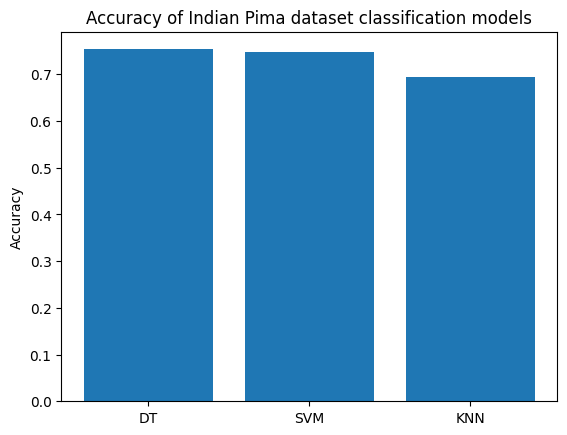

In [67]:
# Afficher les performances des modèles
labels = ['DT', 'SVM', 'KNN']
accs = [acc2, svm.score(X_test, y_test), acc]
plt.bar(labels, accs)
plt.title('Accuracy of Indian Pima dataset classification models')
plt.ylabel('Accuracy')
plt.show()

# select and save the model.

In [88]:

filename = 'model.bin'

import joblib

joblib.dump(grille, 'svm_model.joblib')
joblib.dump(grid, 'dt_model.joblib')
joblib.dump(grid1, 'knn_model.joblib')


['knn_model.joblib']

In [69]:
feature_names

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

In [80]:
# load the model from disk
loaded_model = joblib.load("svm_model.joblib")


In [81]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
data = {
    'preg':	1,
    'plas':	1,
    'pres': 1,
    'skin':	1,
    'test':	1,
    'mass':	1,
    'pedi':	1,
    'age': 12
}

# Create a NumPy array with the example data
input = np.array([[
    data['preg'],
    data['plas'],
    data['pres'],
    data['skin'],
    data['test'],
    data['mass'],
    data['pedi'],
    data['age']
]])



In [83]:
# Use the loaded model to make predictions for the example input
prediction = loaded_model.predict(input)

# Print the prediction (0 for not survived, 1 for survived)
if prediction[0] == 0:
    print("The model predicts that the passenger did not survive.")
else:
    print("The model predicts that the passenger survived.")

The model predicts that the passenger survived.


In [84]:
prediction

array([1])